<a href="https://colab.research.google.com/github/nuo24/web_crawler/blob/main/Nate_Hackathon_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Mining Fundamentals

We will discuss fundamentals from Infomation retrieval theory, mainly TF-IDF, the cosine similarity metric, and detecting collocation patterns. <br>


Before getting into the fundamentals, let us first look at how we can "clean" the text file scraped from internet which has unwanted contents such as html tags and so on as follows

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup # pip install beautifulsoup4

def cleanHtml(html):
    if html == "": return ""

    return BeautifulSoup(html, 'html5lib').get_text()

txt = '''This is the best piece about privacy that I&#39;ve read in a long time!
If it doesn&#39;t change how you think about the privacy issue, I&#39;ll be
surprised.  It opens:<br /><br />&quot;Many governments (including our own,
here in the US) would have its citizens believe that privacy is a switch (that
is, you either reasonably expect it, or you don’t). This has been demonstrated
in many legal tests, and abused in many circumstances ranging from spying
on electronic mail, to drones in our airspace monitoring the movements of
private citizens. But privacy doesn’t work like a switch – at least it shouldn’t
for a country that recognizes that privacy is an inherent right. In fact,
privacy, like other components to security, works in layers...&quot;<br /><br />
Please read! '''

print(cleanHtml(txt))

This is the best piece about privacy that I've read in a long time!
If it doesn't change how you think about the privacy issue, I'll be
surprised.  It opens:"Many governments (including our own,
here in the US) would have its citizens believe that privacy is a switch (that
is, you either reasonably expect it, or you don’t). This has been demonstrated
in many legal tests, and abused in many circumstances ranging from spying
on electronic mail, to drones in our airspace monitoring the movements of
private citizens. But privacy doesn’t work like a switch – at least it shouldn’t
for a country that recognizes that privacy is an inherent right. In fact,
privacy, like other components to security, works in layers..."
Please read! 


## TF-IDF
TF-IDF stands for term frequency-inverse document frequency and can be used to query a corpus by calculating normalized scores that express the relative importance of terms in the documents. Mathematically, TF-IDF is expressed as the product of the term frequency and the inverse document frequency, $tf_{idf} = tf*idf$, where the term tf represents the importance of a term in a specific document, and idf represents the importance of a term relative to the entire corpus. Multiplying these terms together produces a score that accounts for both factors and has been an integral part of every major search engine at some point in its existence.
If you want to learn more, click [here](https://nlp.stanford.edu/IR-book/information-retrieval-book.html).

Term fequency is simply the number of times a word appears in a document. It is sometimes represented as just a boolean (0 if it doesnt appear in the document, 1 if it does). It can also be represented as raw count which usually leads to document term matrix (we will use it later) and usually by normalizing it by taking into account the total number of terms in the text, so that the overall score accounts for document length relative to a term’s frequency.
<br>

Toolkits such as NLTK provide lists of stopwords that can be used to filter out terms such as and, a, and the, but keep in mind that there may be terms that evade even the best stopword lists and yet still are quite common to specialized domains. Although you can certainly customize a list of stopwords with domain knowledge, the inverse document frequency metric is a calculation that provides a generic normalization metric for a corpus.<br>
The intuition behind this metric is that it produces a higher value if a term is somewhat uncommon across the corpus than if it is common, which helps to account for the problem with stopwords we just investigated.<br>
IDF is the logarithmically scaled inverse fraction of the documents that contain the word (obtained by dividing the total number of documents by the number of documents containing the term, and then taking the logarithm of that quotient). Sometime we add 1 to avoid multiplying two values less than 1!
So, IDF of term t can be defined as **1+ log (total number of documents/number of documents where the term
t appears)**.

The big idea in TF-IDF calculation is that we’d like to be able to multiply two terms in a way that consistently produces larger TF-IDF scores for more relevant queries than for less relevant queries.

## Frequent words and TF-IDF Basics

In [ ]:
first = "The sky is blue"
second = "We can see the blue sky, shining sun the bright sun"

In [ ]:
def doc_split(text):
    text_s = text.split(" ")
    return text_s

doc_list = [first, second]
for docs in doc_list:
    print (doc_split(docs))

['The', 'sky', 'is', 'blue']
['We', 'can', 'see', 'the', 'blue', 'sky,', 'shining', 'sun', 'the', 'bright', 'sun']


In [ ]:
import nltk

def freq_word(raw_text):
    tokens = nltk.word_tokenize(raw_text)
    text = nltk.Text(tokens)
    tokens_l = [w for w in tokens]
    freq = nltk.FreqDist(tokens_l)
    return (freq)



In [ ]:
for docs in doc_list:
    print ([freq_word(docs)])

[FreqDist({'The': 1, 'sky': 1, 'is': 1, 'blue': 1})]
[FreqDist({'the': 2, 'sun': 2, 'We': 1, 'can': 1, 'see': 1, 'blue': 1, 'sky': 1, ',': 1, 'shining': 1, 'bright': 1})]


In [ ]:
#split so each word have their own string
first = first.split(" ")
second= second.split(" ")

#join them to remove common duplicate words
total= set(first).union(set(second))

In [ ]:
#Now lets add a way to count the words using a dictionary key-value pairing for both sentences
wordDictA = dict.fromkeys(total, 0)
wordDictB = dict.fromkeys(total, 0)

for word in first:
    wordDictA[word]+=1

for word in second:
    wordDictB[word]+=1
#put them in a dataframe and then view the result:
pd.DataFrame([wordDictA, wordDictB])

,We,shining,sky,"sky,",bright,see,can,sun,is,blue,The,the
0,0,0,1,0,0,0,0,0,1,1,1,0
1,1,1,0,1,1,1,1,2,0,1,0,2


In [ ]:
#Now writing the TF function:
def computeTF(wordDict, bow):
    tfDict = {}
    bowCount = len(bow)
    for word, count in wordDict.items():
        tfDict[word] = count/float(bowCount)
    return tfDict

#running our sentences through the tf function:
tfFirst = computeTF(wordDictA, first)
tfSecond = computeTF(wordDictB, second)

#Converting to dataframe for visualization
tf_df= pd.DataFrame([tfFirst, tfSecond])
pd.DataFrame([tfFirst, tfSecond])

,We,shining,sky,"sky,",bright,see,can,sun,is,blue,The,the
0,0.000000,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.250000,0.25,0.000000
1,0.090909,0.090909,0.00,0.090909,0.090909,0.090909,0.090909,0.181818,0.00,0.090909,0.00,0.181818


In [ ]:
import math
#creating the log portion of the Excel table we saw earlier
def computeIDF(docList):
    idfDict = {}
    N = len(docList)

    idfDict = dict.fromkeys(docList[0].keys(), 0)
    for doc in docList:
        for word, val in doc.items():
            if val > 0:
                idfDict[word] += 1

    for word, val in idfDict.items():
        idfDict[word] = math.log10(N / float(val))

    return idfDict

#inputing our sentences in the IDF
idfs = computeIDF([wordDictA, wordDictB])
computeIDF([wordDictA, wordDictB])


{'We': 0.3010299956639812,
 'shining': 0.3010299956639812,
 'sky': 0.3010299956639812,
 'sky,': 0.3010299956639812,
 'bright': 0.3010299956639812,
 'see': 0.3010299956639812,
 'can': 0.3010299956639812,
 'sun': 0.3010299956639812,
 'is': 0.3010299956639812,
 'blue': 0.0,
 'The': 0.3010299956639812,
 'the': 0.3010299956639812}

In [ ]:
#The actual calculation of TF*IDF from the table above:
def computeTFIDF(tfBow, idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val*idfs[word]
    return tfidf

#running our two sentences through the TFIDF:
tfidfFirst = computeTFIDF(tfFirst, idfs)
tfidfSecond = computeTFIDF(tfSecond, idfs)
#putting it in a dataframe
tfidf= pd.DataFrame([tfidfFirst, tfidfSecond])
pd.DataFrame([tfidfFirst, tfidfSecond])

,We,shining,sky,"sky,",bright,see,can,sun,is,blue,The,the
0,0.000000,0.000000,0.075257,0.000000,0.000000,0.000000,0.000000,0.000000,0.075257,0.0,0.075257,0.000000
1,0.027366,0.027366,0.000000,0.027366,0.027366,0.027366,0.027366,0.054733,0.000000,0.0,0.000000,0.054733


## Running TF-IDF on sample data


In [ ]:
from math import log

# Enter in a query term from the corpus variable
QUERY_TERMS = ['mr.', 'green']

def tf(term, doc, normalize=True):
    doc = doc.lower().split()
    if normalize:
        return doc.count(term.lower()) / float(len(doc))
    else:
        return doc.count(term.lower()) / 1.0

def idf(term, corpus):
    num_texts_with_term = len([True for text in corpus if term.lower()
                              in text.lower().split()])

    # tf-idf calc involves multiplying against a tf value less than 0, so it's
    # necessary to return a value greater than 1 for consistent scoring.
    # (Multiplying two values less than 1 returns a value less than each of
    # them.)

    try:
        return 1.0 + log(float(len(corpus)) / num_texts_with_term)
    except ZeroDivisionError:
        return 1.0

def tf_idf(term, doc, corpus):
    return tf(term, doc) * idf(term, corpus)



In [ ]:
corpus = \
    {'a': 'Mr. Green killed Colonel Mustard in the study with the candlestick. \
Mr. Green is not a very nice fellow.',
     'b': 'Professor Plum has a green plant in his study.',
     'c': "Miss Scarlett watered Professor Plum's green plant while he was away \
from his office last week."}

for (k, v) in sorted(corpus.items()):
    print(k, ':', v)
print()

# Score queries by calculating cumulative tf_idf score for each term in query

query_scores = {'a': 0, 'b': 0, 'c': 0}
for term in [t.lower() for t in QUERY_TERMS]:
    for doc in sorted(corpus):
        print('TF({0}): {1}'.format(doc, term), tf(term, corpus[doc]))
    print('IDF: {0}'.format(term), idf(term, corpus.values()))
    print()

    for doc in sorted(corpus):
        score = tf_idf(term, corpus[doc], corpus.values())
        print('TF-IDF({0}): {1}'.format(doc, term), score)
        query_scores[doc] += score
    print()

print("Overall TF-IDF scores for query '{0}'".format(' '.join(QUERY_TERMS)))
for (doc, score) in sorted(query_scores.items()):
    print(doc, score)

a : Mr. Green killed Colonel Mustard in the study with the candlestick. Mr. Green is not a very nice fellow.
b : Professor Plum has a green plant in his study.
c : Miss Scarlett watered Professor Plum's green plant while he was away from his office last week.

TF(a): mr. 0.10526315789473684
TF(b): mr. 0.0
TF(c): mr. 0.0
IDF: mr. 2.09861228866811

TF-IDF(a): mr. 0.22090655670190631
TF-IDF(b): mr. 0.0
TF-IDF(c): mr. 0.0

TF(a): green 0.10526315789473684
TF(b): green 0.1111111111111111
TF(c): green 0.0625
IDF: green 1.0

TF-IDF(a): green 0.10526315789473684
TF-IDF(b): green 0.1111111111111111
TF-IDF(c): green 0.0625

Overall TF-IDF scores for query 'mr. green'
a 0.3261697145966431
b 0.1111111111111111
c 0.0625


## Play with NLTK


In [ ]:
# Explore some of NLTK's functionality by exploring the data.

import json
import nltk
from collections import Counter

# Download ancillary nltk packages if not already installed
#nltk.download('stopwords')
DATA = 'data.json'
# Load in human language data from wherever you've saved it
data = json.loads(open(DATA).read())
# Combine titles and post content
all_content = " ".join([ i['title'] + " " + i['content'] for i in data ])

In [ ]:
tokens = all_content.split()

In [ ]:
# Number of words in the text
print('Number of tokens:', len(tokens))

Number of tokens: 21758


### Lowercasing the data

In [ ]:
tokens_lower = all_content.lower().split()

In [ ]:
# Number of words in the text
print('Number of tokens:', len(tokens_lower))

Number of tokens: 21758


### Stopwords
They are useless so let us remove them!

In [ ]:
## words in raw data

from nltk.corpus import stopwords
from collections import Counter
filtered = [w for w in tokens if not w in stopwords.words('english')]
count = Counter(filtered)
print(count.most_common(100))

[('I', 235), ('This', 92), ('The', 73), ('new', 54), ('like', 51), ('piece', 45), ('one', 44), ('good', 43), ('make', 41), ('-', 40), ("I'm", 40), ('see', 39), ('people', 37), ('love', 35), ('If', 34), ("O'Reilly", 34), ('get', 34), ('way', 33), ('work', 33), ("It's", 32), ('We', 32), ('It', 31), ('...', 31), ('data', 31), ('And', 30), ('great', 30), ('think', 29), ('us', 28), ('time', 27), ('technology', 27), ('A', 27), ('government', 27), ('many', 25), ('article', 25), ("I've", 25), ('So', 25), ('My', 25), ('business', 24), ('better', 24), ('also', 24), ('US', 24), ('best', 24), ('help', 22), ('much', 21), ('first', 21), ('last', 21), ('book', 20), ('world', 20), ('read', 19), ('But', 19), ('public', 18), ('Google', 18), ('even', 18), ('need', 18), ('makes', 18), ('really', 18), ('video', 18), ('talk', 17), ('explains', 17), ('could', 17), ('know', 17), ('money', 17), ('amazing', 17), ('Next:Economy', 16), ('—', 16), ('lot', 16), ('past', 16), ('going', 16), ('post', 16), ('key', 15)

In [ ]:
## words in lower_cased data

from nltk.corpus import stopwords
from collections import Counter
filtered = [w for w in tokens_lower if not w in stopwords.words('english')]
count = Counter(filtered)
print(count.most_common(100))

[('new', 69), ('one', 54), ('us', 54), ('like', 53), ('good', 48), ('piece', 45), ('make', 44), ('-', 40), ("i'm", 40), ('love', 40), ('see', 39), ('people', 38), ('data', 38), ('get', 38), ('work', 37), ("o'reilly", 34), ('way', 33), ('government', 32), ('...', 31), ('great', 31), ('technology', 30), ('best', 29), ('think', 29), ('time', 27), ('many', 27), ('better', 26), ('help', 26), ('business', 25), ('future', 25), ('article', 25), ('also', 25), ("i've", 25), ('world', 25), ('read', 24), ('last', 23), ('really', 22), ('much', 21), ('even', 21), ('amazing', 21), ('first', 21), ('book', 20), ('google', 20), ('video', 20), ('talk', 19), ('public', 19), ('need', 18), ('makes', 18), ('excellent', 17), ('use', 17), ('explains', 17), ('could', 17), ('know', 17), ('money', 17), ('part', 16), ('open', 16), ('tech', 16), ('next:economy', 16), ('—', 16), ('fascinating', 16), ('lot', 16), ('past', 16), ('going', 16), ('two', 16), ('post', 16), ('key', 15), ('something', 15), ('companies', 15)

### Stemming using NLTK
We can also do stemming using NLTK using a Porter Stemmer. Use it with care. Might not always make sense

In [ ]:
from nltk.stem.porter import *

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

stemmer = PorterStemmer()
stemmed = stem_tokens(filtered, stemmer)
count = Counter(stemmed)
print(count.most_common(100))

[('make', 72), ('new', 69), ('work', 58), ('like', 56), ('one', 54), ('us', 54), ('good', 52), ('get', 50), ('love', 50), ('piec', 45), ('think', 44), ('see', 41), ('-', 40), ("i'm", 40), ('way', 38), ('peopl', 38), ('data', 38), ('time', 36), ('technolog', 35), ('use', 35), ('govern', 35), ('busi', 34), ("o'reilli", 34), ('read', 34), ('book', 33), ('help', 32), ('...', 31), ('great', 31), ('explain', 30), ('talk', 29), ('compani', 29), ('best', 29), ('articl', 28), ('mani', 27), ('better', 26), ('come', 26), ('world', 26), ('look', 26), ('futur', 25), ('also', 25), ("i'v", 25), ('chang', 24), ('need', 24), ('learn', 24), ('go', 24), ('video', 24), ('give', 23), ('job', 23), ('last', 23), ('live', 22), ('stori', 22), ('realli', 22), ('much', 21), ('start', 21), ('idea', 21), ('even', 21), ('amaz', 21), ('first', 21), ('want', 20), ('thing', 20), ('googl', 20), ('open', 20), ('fascin', 20), ('post', 20), ('public', 19), ('run', 19), ('wonder', 19), ('lot', 19), ('excel', 18), ('part', 

## Lemmatization using NLTK

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))

# a denotes adjective in "pos"
print("better :", lemmatizer.lemmatize("better", pos ="a"))

rocks : rock
corpora : corpus
better : good


In [ ]:
from nltk.stem import WordNetLemmatizer

def lemma_tokens(tokens, lemmatizer):
    lemma = []
    for item in tokens:
        lemma.append(lemmatizer.lemmatize(item))
    return lemma

lemmatizer = WordNetLemmatizer()
lemmatized = lemma_tokens(filtered, lemmatizer)
count = Counter(lemmatized)
print(count.most_common(100))

[('new', 69), ('make', 62), ('one', 54), ('u', 54), ('like', 54), ('good', 52), ('piece', 45), ('work', 41), ('-', 40), ('get', 40), ('see', 40), ("i'm", 40), ('love', 40), ('way', 38), ('people', 38), ('data', 38), ('time', 36), ('business', 34), ("o'reilly", 34), ('government', 34), ('book', 32), ('think', 32), ('...', 31), ('great', 31), ('technology', 30), ('company', 29), ('help', 29), ('best', 29), ('article', 28), ('many', 27), ('better', 26), ('world', 26), ('future', 25), ('also', 25), ("i've", 25), ('read', 24), ('video', 24), ('job', 23), ('last', 23), ('story', 22), ('really', 22), ('talk', 21), ('much', 21), ('idea', 21), ('even', 21), ('need', 21), ('amazing', 21), ('first', 21), ('medium', 20), ('thing', 20), ('google', 20), ('post', 20), ('public', 19), ('come', 19), ('lot', 19), ('part', 18), ('give', 18), ('code', 18), ('know', 18), ('excellent', 17), ('want', 17), ('use', 17), ('explains', 17), ('could', 17), ('open', 17), ('service', 17), ('money', 17), ('tech', 16)

## Concordance and collocation

In [ ]:
# demos
text = nltk.Text(tokens)
# Examples of the appearance of the word "open"
#A concordance view shows us every occurrence of a given word, together with some context. )
text.concordance("open")

Displaying 16 of 16 matches:
, and how at least one team is using open source to let others see inside the 
ear that computational biologist and open science advocate (UC Berkeley profes
ear that computational biologist and open science advocate (UC Berkeley profes
: magazine slogan say, "If you can't open it, you don't own it." Predictive po
 I'm proud to be a signatory to this open letter calling for this key policy i
st, I've focused a lot on areas like open source software and the implications
opic at greater length in my article Open Data and Algorithmic Regulation: htt
cessful participatory projects, from open source software to wikis to social m
ere isn't one (except that it's only open to US students - sorry. If anyone ha
new contract that conformed with the open data mandate. If it were consistent 
If it were consistent with the Obama open data guidance, that RFP would requir
ut of step with the administration’s open data policy.The founder of Hipcamp, 
is is a really importan

In [ ]:
# Frequent collocations in the text (usually meaningful phrases)
#collocations are essentially just frequent bigrams, except that we want to pay more attention
#to the cases that involve rare words. In particular, we want to find bigrams that occur more often
#than we would expect based on the frequency of the individual words.
#more details can be found in http://www.nltk.org/howto/collocations.html
# text.collocations()
print(text.collocation_list())

[("O'Reilly", 'Media'), ('New', 'York'), ('Cabo', 'Pulmo'), ('Bay', 'Mini'), ('East', 'Bay'), ('+Jennifer', 'Pahlka'), ('Silicon', 'Valley'), ('Brett', 'Goldstein'), ('Common', 'Core'), ('Maker', 'Faire'), ('worth', 'reading.'), ('NBC', 'Press:Here'), ('Nick', 'Hanauer'), ('Mini', 'Maker'), ('Next:Economy', 'Summit'), ('White', 'House'), ('income', 'inequality.'), ('weeks', 'ago,'), ('+Bryce', 'Roberts'), ('Bill', 'Janeway')]


In [ ]:
# Frequency analysis for words of interest
fdist = text.vocab()
print(fdist["open"])
print(fdist["source"])
print(fdist["web"])
print(fdist["2.0"])

13
5
1
0


In [ ]:

# Number of unique words in the text
print('Number of unique words:', len(fdist.keys()))

Number of unique words: 5792


In [ ]:
# Common words that aren't stopwords
print('Common words that aren\'t stopwords')
print([w for w in list(fdist.keys())[:100]
   if w.lower() not in nltk.corpus.stopwords.words('english')])

Common words that aren't stopwords
['excellent', 'account', 'competitive', 'dynamics', 'shifting', "Lyft's", 'favor', 'ride...', 'ride-sharing', 'battle', 'Uber.', 'Unfortunately,', 'analysis', 'impact', 'autonomous', 'cars', 'shallow.', 'notes', 'vehicles', '"can', 'utilized', 'nearly', '100%', 'time."', 'Yet', 'one', 'key', 'drivers', 'peer-to-peer', 'model', 'pulls', 'part', 'time', 'workers', 'address', 'inherently', 'lumpy', 'demand.', 'enough', 'meet', 'peak', 'demand,', 'way', 'need.', '(I', 'talk', 'tradeoffs,', 'properly', 'understand', 'autonomy', 'intersects', 'on-demand', 'business', 'many', 'subjects', 'forthcoming', 'book', 'WTF:', "What's", 'Future', 'Us.)', 'Nonetheless,', 'must-read', 'article', 'game', 'changing', 'technology.', 'particularly']


In [ ]:
# Top 10 Most Common Words
print('Top 10 Most Common Words')
print(fdist.most_common(10))

Top 10 Most Common Words
[('the', 1059), ('to', 624), ('of', 597), ('and', 515), ('a', 447), ('in', 334), ('is', 312), ('for', 264), ('I', 235), ('that', 226)]


## Querying text data with TF-IDF

In [ ]:
import json
import nltk

# Provide your own query terms here

QUERY_TERMS = ['Government']

# Load in human language data from wherever you've saved it
DATA = 'data.json'
data = json.loads(open(DATA).read())

activities = [post['content'].lower().split()
              for post in data
                if post['content'] != ""]

# TextCollection provides tf, idf, and tf_idf abstractions so
# that we don't have to maintain/compute them ourselves

tc = nltk.TextCollection(activities)

relevant_activities = []

for idx in range(len(activities)):
    score = 0
    for term in [t.lower() for t in QUERY_TERMS]:
        score += tc.tf_idf(term, activities[idx])
    if score > 0:
        relevant_activities.append({'score': score, 'title': data[idx]['title']})

# Sort by score and display results

relevant_activities = sorted(relevant_activities,
                             key=lambda p: p['score'], reverse=True)
for activity in relevant_activities:
    print('Title: {0}'.format(activity['title']))
    print('Score: {0}'.format(activity['score']))
    print()

Title: Totally hilarious and spot-on. Has to be the best public service video ever done by a government office...
Score: 0.10660131264074077

Title: Excellent set of principles for digital government. Echoes those put forward by the UK Government and...
Score: 0.10250126215455843

Title: "We need to show every American competent government services they can actually use, services that treat...
Score: 0.09517974342923281

Title: If you're interested about the emerging startup ecosystem around government transformation (a $172 Billion...
Score: 0.09189768331098341

Title: I'm proud to be a judge for the new +Code for America tech awards. If you are doing something remarkable...
Score: 0.08737812511536129

Title: This is a wonderful analysis of a set of anti-patterns in enterprise software development. While it ...
Score: 0.057935496000402584

Title: Fundraiser for Libby Schaaf for Mayor of Oakland at the BlueSprout industrial co working space. Oakland...
Score: 0.057935496000402584

Titl

### Excercise:
    
review nltk.TextCollection and analyze how it words

------------------------------------------------------------

## Finding similar documents using cosine similarity

The dot product of two vectors __A__ and **B** can be thought of as a projection of one vector into the other.
<img src="dot_product.png">

By measuring how much of **A** is in the same direction as **B**, we get a measure of how similar **A** is to **B**. The idea behind the following exercise is to create vectors for each document in our corpus consisting of the TF-IDF scores of the terms in those documents:

```
v_1 = [ tf_idf(term_1, doc_1), tf_idf(term_2, doc_1), ..., tf_idf(term_n, doc_1) ]
v_2 = [ tf_idf(term_1, doc_2), tf_idf(term_2, doc_2), ..., tf_idf(term_n, doc_2) ]
```

The dot product of these vectors:

$\mathbf{v_1} \cdot \mathbf{v_2} = |\mathbf{v_1}||\mathbf{v_2}|\cos(\theta)$.

Now you see where the cosine comes in. The "cosine distance" between $\mathbf{v1}$ and $\mathbf{v2}$ is then given by

$$
d = 1 - \frac{\mathbf{v_1} \cdot \mathbf{v_2}}{|\mathbf{v_1}||\mathbf{v_2}|}
$$

In [ ]:
import json
import nltk
import nltk.cluster

# Load in human language data from wherever you've saved it
DATA = 'data.json'
data = json.loads(open(DATA).read())

all_posts = [ (i['title'] + " " + i['content']).lower().split() for i in data ]

# Provides tf, idf, and tf_idf abstractions for scoring

tc = nltk.TextCollection(all_posts)



In [ ]:
# Compute a term-document matrix such that td_matrix[doc_title][term]
# returns a tf-idf score for the term in the document

td_matrix = {}
for idx in range(len(all_posts)):
    post = all_posts[idx]
    fdist = nltk.FreqDist(post)

    doc_title = data[idx]['title'].replace('\n', '')
    td_matrix[doc_title] = {}

    for term in fdist.keys():
        td_matrix[doc_title][term] = tc.tf_idf(term, post)



In [ ]:
# Build vectors such that term scores are in the same positions...
distances = {}
for title1 in td_matrix.keys():

    distances[title1] = {}
    (min_dist, most_similar) = (1.0, ('', ''))

    for title2 in td_matrix.keys():

        # Take care not to mutate the original data structures
        # since we're in a loop and need the originals multiple times

        terms1 = td_matrix[title1].copy()
        terms2 = td_matrix[title2].copy()

        # Fill in "gaps" in each map so vectors of the same length can be computed
        for term1 in terms1:
            if term1 not in terms2:
                terms2[term1] = 0

        for term2 in terms2:
            if term2 not in terms1:
                terms1[term2] = 0

        # Create vectors from term maps
        v1 = [score for (term, score) in sorted(terms1.items())]
        v2 = [score for (term, score) in sorted(terms2.items())]

        # Compute similarity amongst documents
        distances[title1][title2] = nltk.cluster.util.cosine_distance(v1, v2)

        if title1 == title2:
            #print distances[title1][title2]
            continue

        if distances[title1][title2] < min_dist:
            (min_dist, most_similar) = (distances[title1][title2], title2)

    print(u'Most similar (score: {})\n{}\n{}\n'.format(1-min_dist, title1,
                                                       most_similar))

Most similar (score: 0.0971495885458028)
This is an excellent account of how the competitive dynamics are shifting in Lyft's favor in its ride...
As Jason Tanz of Wired, who urged me to write this piece, summarized its argument: "Uber was the product...

Most similar (score: 0.09567029049269093)
Billionaire Nick Hanauer has some blistering advice for his fellow plutocrats on the left. If you want...
Nick Hanauer is so quotable. He talks “Trickle down clowns,” wage suppression, and corporate welfare...

Most similar (score: 0.11319350317462973)
Cheryl Platz, former senior UX designer on Amazon's Alexa platform team, recently spoke with O'Reilly...
My thoughts on conversational interfaces, and why Alexa is now the market leader. If Siri, Google Now...

Most similar (score: 0.15556848369037235)
Brett Goldstein gives some excellent advice on basic security hygiene. It the most obvious cure for ...
Worried about predictive policing? This profile of Civicscape and its co-founder Brett Goldst


Most similar (score: 0.06743792728497522)
Wow! I thought I was strong on the topic in my forthcoming book, but David Hennemeier Hansen goes biblical...
As Jason Tanz of Wired, who urged me to write this piece, summarized its argument: "Uber was the product...

Most similar (score: 0.1508890560507048)
ARPA-E is the Advanced Research Projects Agency for energy innovation. As you might expect, its funding...
Before you try to fix a problem, understand it. Saul Griffith and his team at Otherlab have done an ...

Most similar (score: 0.11439810746893375)
So glad to see this conservative support for a carbon tax with the proceeds rebated to the public in...
So Bill Gates thinks we need to 'science the shit' out of energy (and have a carbon tax.) So do I.

Most similar (score: 0.08947389510901349)
This account of a 1964 lecture by a neo-Nazi at UC Berkeley is an excellent explanation of free speech...
This is an excellent account of how the competitive dynamics are shifting in Lyft's favor i


Most similar (score: 0.09492075022925806)
So what if the machines are so productive that they take away many of the jobs humans do today? There's...
Lovely paean to the jobs of book collecting!This is what Milton means in his sublime “Areopagitica...

Most similar (score: 0.12679067318570814)
We've now opened registration for the second annual Next:Economy summit. Here is my post announcing ...
Just published a narrative describing the nearly final schedule for the Next:Economy Summit. Hope to...

Most similar (score: 0.11700991617212086)
You've got to love this guy! So glad that he'll be a speaker at my Next:Economy Summit in October....
Here are the slides from my talk at the Web Summit in Dublin.

Most similar (score: 0.10209884467511299)
Good piece about self driving cars and the disruption that Detroit is trying to embrace before it runs...
This piece by Bill Janeway should be required reading for anyone trying to understand the implications...

Most similar (score: 0.18199448794

Most similar (score: 0.2703310388496172)
Crate stacking is hard! (At least for me.) But there's so much other great stuff at East Bay Mini Maker...
If you aren't planning to come to East Bay Mini Maker Faire in Oakland tomorrow, here are 170 reasons...

Most similar (score: 0.6205617182457673)
Part One of my NBC Press:Here TV interview from Friday. I talk about the history and mission of O'Reilly...
Part Two of my NBC Press:Here TV interview from 

Most similar (score: 0.6205617182457673)
Part Two of my NBC Press:Here TV interview from 
Part One of my NBC Press:Here TV interview from Friday. I talk about the history and mission of O'Reilly...

Most similar (score: 0.15549304349931614)
"Surely Democrats and Republicans could agree to cut billions from a failed program like this!" you ...
Can We Use Data to Make Better Regulations?Evgeny Morozov either misunderstands or misrepresents the...

Most similar (score: 0.14580716800215687)
I love that +Kickstarter  and the UN Refugee Agency are

Most similar (score: 0.1737017048587295)
This piece by Bill Janeway should be required reading for anyone trying to understand the implications...
Bill Janeway provides powerful historical and economic context for the current state of world politics...

Most similar (score: 0.06998320160262617)
Brilliant and important!"What we have, uniquely in America, is a political class, and an entire political...
This was my favorite piece in this Sunday's New York Times. It's a fascinating article about CBW, a ...

Most similar (score: 0.045529766172355046)
I like how Evan thinks. Smart, and with good values.
I like to think that O'Reilly books are always a great value, but when they go on special sale, like...

Most similar (score: 0.1315136469006878)
A good example of why you can think of edge.org as TED in text form :-)  It's full of brilliant essays...
I was one of the warmup acts for President Obama at his Frontiers Conference on Science and Technology...

Most similar (score: 0.139425252694


Most similar (score: 0.10420138135351498)
When I was in Spain a few weeks ago, I was struck by how beautiful the cacti could be, limned in light...
A couple of weeks ago, I sat down with New York Times senior editor Charles Duhigg at the Aspen Ideas...

Most similar (score: 0.009967360191092678)
Othermachines ready to ship.  This is the Macintosh of desktop manufacturing.
This is a wonderful analysis of a set of anti-patterns in enterprise software development. While it ...

Most similar (score: 0.09151193284911052)
Now on Medium--the Best of O'Reilly Radar: http://bit.ly/133U4wb  Our latest thinking on the big ideas...
O'Reilly Media President Laura Baldwin explains the business rationale behind our decision to close ...

Most similar (score: 0.12549451157333702)
The view from the offices of Passport Capital at One Market. Amazing how much construction is happening...
October 30, at O'Reilly Media offices in Cambridge.  Docker seems to us to be one of the most important...

Most simi


Most similar (score: 0.0427310419690784)
What is not to love?! “@edabot: Chocolate millennium falcon made w help from #othermill @othermill +...
This made me laugh out loud. One thing Trump has been good for is the rise of colorful commentary! "...

Most similar (score: 0.10389318110715073)
Marilynne Robinson's Gilead is one of my favorite books ever.  I have re-read some passages dozens of...
I just did an hour video interview with +Slashdot. Here's what they had to say about it:"We've run...

Most similar (score: 0.1198548426637629)
I'm bummed I had a conflict and couldn't be there for the moment!  Governor Jerry Brown endorses my ...
Fundraiser for Libby Schaaf for Mayor of Oakland at the BlueSprout industrial co working space. Oakland...

Most similar (score: 0.09065554922722852)
Actually, I think this shot is better.
I'm so impressed with what Reid Hoffman and June Cohen have done with the #MastersOfScale podcast, so...

Most similar (score: 0.15634099832796367)
The other morning

## Generating a figure to visually display the cosine similarity between documents

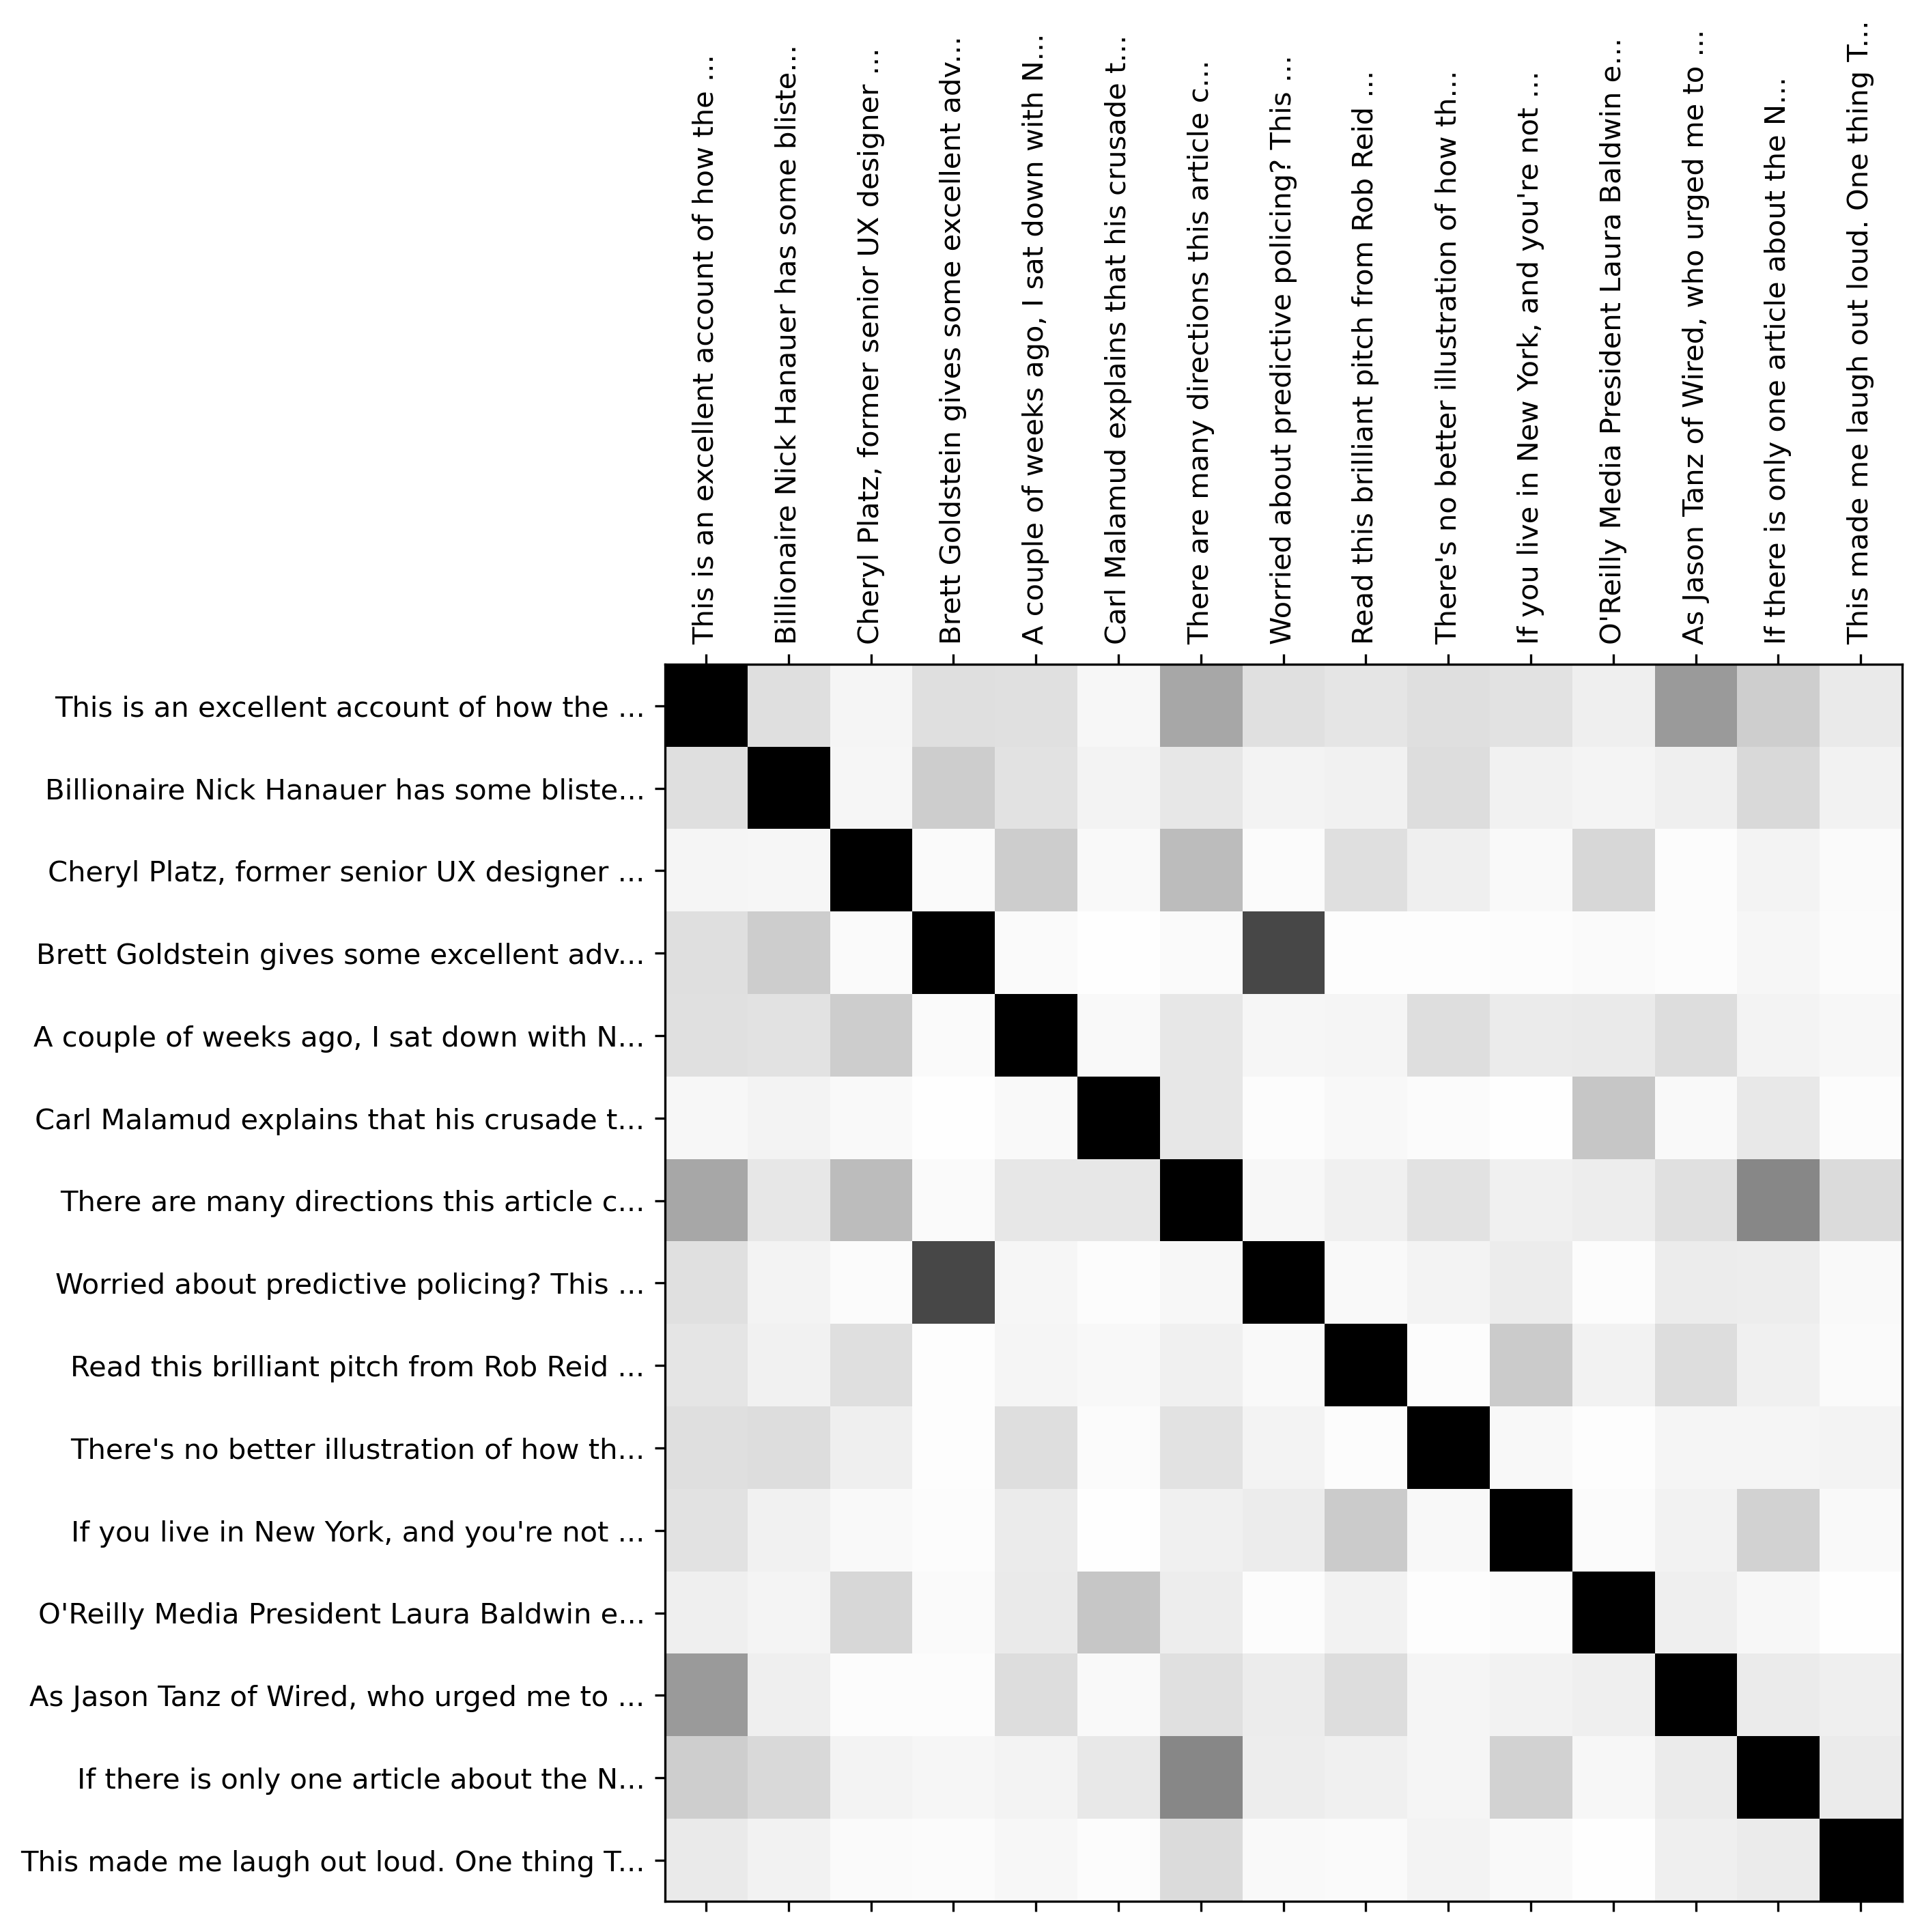

In [ ]:
import numpy as np
import matplotlib.pyplot as plt # pip install matplotlib
%matplotlib inline

max_articles = 20

# Get the titles - the keys to the 'distances' dict
keys = list(distances.keys())

# Extract the article titles
titles = [l[:40].replace('\n',' ')+'...' for l in list(distances.keys())][:15]

n_articles = len(titles) if len(titles) < max_articles else max_articles

# Initialize the matrix of appropriate size to store similarity scores
similarity_matrix = np.zeros((n_articles, n_articles))

# Loop over the cells in the matrix
for i in range(n_articles):
    for j in range(n_articles):
        # Retrieve the cosine distance between articles i and j
        d = distances[keys[i]][keys[j]]

        # Store the 'similarity' between articles i and j, defined as 1.0 - distance
        similarity_matrix[i, j] = 1.0 - d


# Create a figure and axes
fig = plt.figure(figsize=(8,8), dpi=300)
ax = fig.add_subplot(111)

# Visualize the matrix with colored squares indicating similarity
ax.matshow(similarity_matrix, cmap='Greys', vmin = 0.0, vmax = 0.2)

# Set regular ticks, one for each article in the collection
ax.set_xticks(range(n_articles))
ax.set_yticks(range(n_articles))

# Set the tick labels as the article titles
ax.set_xticklabels(titles)
ax.set_yticklabels(titles)

# Rotate the labels on the x-axis by 90 degrees
plt.xticks(rotation=90);

## Exercise:

### **Exercise 1:**



Download 'data_week_2.csv' from Bb. Read the 'data_week_2.csv file and look at its contents. It should have a header (the first line of the file) that tells you which fields contain what data.

**1.1**: preprocess the data: with respect to the data, normalize the tweets. You can use any type of pre-processing that you find fit for this dataset.

**1.2**. Extract the top 50 most frequent unigrams and bigrams from the pre-processed tweets. visualize the frequency outcomes.

**1.3**. Extract the top 50 words with highest tf-idf score from the pre-processed tweets. Hint: The code we reviewed return the tf-idf score of each word in each document. To calculate the top n words with highest tf-idf score, you need to get the sum of words by columns and select the top n keywords. Visualize the tf-idf scores


In [ ]:
import csv
import nltk, re, string, collections
import pandas as pd
from nltk.util import ngrams

In [ ]:
csv_tweet = open("data_week_2.csv", "r", encoding='UTF-8')
alll = csv.reader(csv_tweet, delimiter='\t')

In [ ]:

uni = ngrams(tkn, 1)
bi = ngrams(tkn, 2)

NameError: ignored

In [ ]:
uni_freq = collections.Counter(uni)

uni_freq.most_common(50)

In [ ]:
bi_freq = collections.Counter(bi)
bi_freq.most_common(50)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(all_tweet_df['Tweet'])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
tf_idf_df = pd.DataFrame(denselist, columns=feature_names)

In [ ]:
tf_idf_ws = tf_idf_df.sum(axis=0)
tf_idf_ws.sort_values(axis=0, ascending=False)[:50]

### **Exercise 2:**

Download 'stories' folder from Bb. Review the files and look at their contents.

**2.1**: preprocess the data: with respect to the data, normalize the stories. You can use any type of pre-processing that you find fit for this dataset.

**2.2**. Extract the top 50 frequent unigrams and bigrams from the pre-processed stories. visualize the frequency outcomes.

**2.3**. Extract the top 50 words with highest tf-idf score from the pre-processed stories. Visualize the tf-idf scores


**2.4**: Look into the results of the two datasets (tweets, and stories). What can they tell about the data?


In [ ]:
alls = open(os.path.join('stories', filename), 'rb')

In [ ]:
tkn = alls.split()
uni = ngrams(tkn, 1)
bi = ngrams(tkn, 2)

In [ ]:
uni_freq = collections.Counter(uni)
uni_freq.most_common(50)

In [ ]:
bi_freq = collections.Counter(bi)
bi_freq.most_common(50)

In [ ]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(alls_df['Story'])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
tf_idf_df = pd.DataFrame(denselist, columns=feature_names)

In [ ]:
tf_idf_df
tf_idf_ws = tf_idf_df.sum(axis=0)
tf_idf_ws.sort_values(axis=0, ascending=False)[:50]

### **Exercise 3:**

**3.1**. Go to https://scikit-learn.org/stable/ and review the following documentations:

1- [sklearn.feature_extraction.text.CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

2- [sklearn.feature_extraction.text.TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

3- [sklearn.metrics.pairwise import cosine_similarity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html)

**3.2**. Now, implement tf-idf vectorizer using sklearn and extract the top 50 tf-idf words for the stories dataset.  

**3.3**. After getting the tfidf vectors of stories, calculate cosine_similarity of the stories and extract the top 20 most similarstories from your dataset. Visualize the outcome.



In [ ]:
tf_idf_ws.sort_values(axis=0, ascending=False)[:50]
alls_line = all_stories.splitlines()

In [ ]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(all_stories_line)
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
tf_idf_df = pd.DataFrame(denselist, columns=feature_names)

In [ ]:
# code taking a very long time to load